In [1]:
import pandas as pd

from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np

## 데이터 불러오기 빅데이터 센터 가서는 주석 다 풀고 실행하세요(ln[2, 4, 5])

In [2]:
df_은행 = pd.read_excel("은행_정규화.xlsx") 
#df_연금 = pd.read_excel("연금_정규화.xlsx")
#df_생활인구 = pd.read_excel("생활인구_정규화.xlsx")
df_독거노인 = pd.read_excel("독거노인_정규화.xlsx")
#df_소득 = pd.read_excel("소득_정규화.xlsx")
df_기초생활 = pd.read_excel("기초생활보장수급자_정규화.xlsx")
df_요양기관 = pd.read_excel("요양기관_정규화.xlsx")

In [3]:
## 은행분포 : 값이 낮을수록 은행 분포가 낮고 값이 높을수록 은행 분포가 높도록 설정
df_은행["행정동별은행분포"]=1-df_은행["행정동별은행합계"] 
#df_은행

In [4]:
#df_은행["행정동코드"] = df_연금["행정동코드"]
#df_은행["행정동코드"] = df_소득["행정동코드"]
df_은행["행정동코드"] = df_독거노인["행정동코드"]
#df_은행["행정동코드"] = df_생활인구["행정동코드"]
df_은행["행정동코드"] = df_요양기관["행정동코드"]
df_은행["행정동코드"] = df_기초생활["행정동코드"]

In [5]:
#TargetA 가중치
df_은행["TargetA밀도"] =df_독거노인["행정동별독거노인합계"]*0.25+df_요양기관["행정동별요양기관정원"]*0.25+ df_기초생활["행정동별기초생활보장수급자합계"]*0.5


#TargetB 가중치
#df_은행["TargetB밀도"] = df_소득["행정동별평균소득"]*0.5 + df_연금["행정동별연금평균"]*0.25 +df_생활인구["행정동별생활인구합계"]*0.25


In [6]:
#df_은행

In [7]:
# KMeans (TargetA)

In [8]:
X_a = df_은행[["행정동별은행분포","TargetA밀도"]]
#X_a 

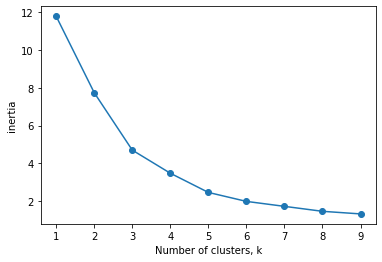

In [9]:
# Inertia value를 이용한 적정 군집수 판단

ks = range(1,10) # 1부터 10까지의 군집을 가지고 있을때

inertias = []



for k in ks:

    kMeans = KMeans(n_clusters=k)

    kMeans.fit(X_a)

    inertias.append(kMeans.inertia_)

    

# Plot ks vs inertias

plt.plot(ks, inertias, '-o')

plt.xlabel('Number of clusters, k')

plt.ylabel('inertia')

plt.xticks(ks)

plt.show() 


In [10]:
# 3 에서 5까지 변화의 값이 크지않다. 그러므로 3개에서 5개 사이의 클러스터를 가졌을때 적절하다
# k = 3로 설정
kMeans = KMeans(n_clusters=3,algorithm='auto')
kMeans.fit(X_a)

y_kmed = kMeans.fit_predict(X_a)

predict_a3 = pd.DataFrame(kMeans.predict(X_a))
predict_a3.columns=['predict_a3']

y_kmed

array([2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 0, 0, 2,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 2, 1,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 2, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 2, 0, 0, 0, 0, 1, 1, 0, 0, 2, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 2, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,

In [11]:
kMeans.inertia_

4.697458692774806

In [12]:
from sklearn.metrics import silhouette_samples, silhouette_score

silhouette_avg = silhouette_score(X_a, y_kmed)
print(silhouette_avg)

0.4486779614226936


In [13]:
sample_silhouette_values = silhouette_samples(X_a, y_kmed)
for i in range(3):
    ith_cluster_silhouette_values = sample_silhouette_values[y_kmed == i]
    print(np.mean(ith_cluster_silhouette_values))

0.47315426561321766
0.4276555401732721
0.3084956591582368


In [14]:
r = pd.concat([X_a,predict_a3],axis=1)
#r

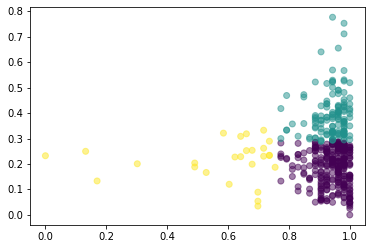

In [15]:
#분포도 시각화
plt.scatter(r['행정동별은행분포'],r['TargetA밀도'],c=r['predict_a3'],alpha=0.5)


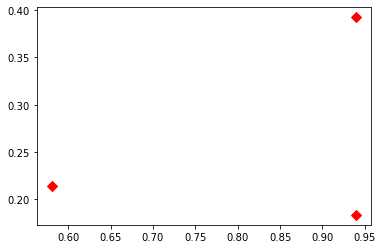

In [16]:
#중심표시
centers = pd.DataFrame(kMeans.cluster_centers_,columns=['행정동별은행분포','TargetA밀도'])
center_x = centers['행정동별은행분포']
center_y = centers['TargetA밀도']
plt.scatter(center_x,center_y,s=50,marker='D',c='r')

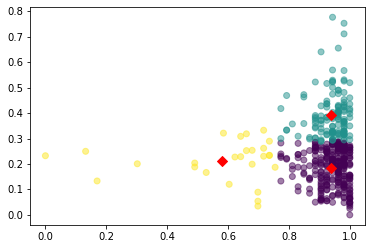

In [17]:
#분포도에 중심표시
plt.scatter(r['행정동별은행분포'],r['TargetA밀도'],c=r['predict_a3'],alpha=0.5)
plt.scatter(center_x,center_y,s=50,marker='D',c='r')

## 여기서 centers의 값이랑 위의 우리가 원하는 우선순위가 매칭되게 생각 잘 해주세요

In [18]:
centers = kMeans.cluster_centers_
print(centers)
#predict_a3에 지금 0 1 2 로 들어가 있는 값을 1 2 0으로 바꾸고 싶다.(위의 분포 사진을 보고 파악해야함)
# 0 1 2 - > 1 2 0

[[0.93975129 0.18311271]
 [0.93959448 0.39262192]
 [0.58055152 0.21353453]]


In [19]:
data = pd.merge(df_은행, r, on=["행정동별은행분포", "TargetA밀도"])

In [20]:
data = data[['행정동코드', '구', '동', 'predict_a3']]
#data

## 위에서 생각한 우리가 원하는 우선순위가 되게 = 이전의 data [ ] 의 숫자를 변경해주세요

In [21]:
#data의 [ ] 부분에 지금 현재 a3에 들어있는 값 == [] 이면 1 아니면 0을 넣는 column을 생성해라(3번 시행)
data['cluster1'] = (data['predict_a3'] == 0 ).astype(int)
data['cluster2'] = (data['predict_a3'] == 1 ).astype(int)
data['cluster0'] = (data['predict_a3'] == 2 ).astype(int)

#새로 만든 column들을 더해서 우리가 진짜 원하는 순차적인 우선순위를 가진 cluster를 갖게 합산해서 cluster라는 컬럼을 만들자.
# 0 1 2를 2점 1점 0점으로 되게

data['cluster'] = data['cluster0']*2 + data['cluster1']*1 + data['cluster2'] * 0
data

,행정동코드,구,동,predict_a3,cluster1,cluster2,cluster0,cluster
0,11110530,종로구,사직동,2,0,0,1,2
1,11110540,종로구,삼청동,0,1,0,0,1
2,11110550,종로구,부암동,0,1,0,0,1
3,11110560,종로구,평창동,0,1,0,0,1
4,11110570,종로구,무악동,0,1,0,0,1
...,...,...,...,...,...,...,...,...
419,11740700,송파구,풍납1동,1,0,1,0,0
420,11740570,송파구,거여1동,1,0,1,0,0
421,11740610,강동구,고덕1동,1,0,1,0,0
422,11740685,강동구,고덕2동,1,0,1,0,0


In [22]:
data2 = data[['행정동코드', '구', '동', 'cluster']]
data2

,행정동코드,구,동,cluster
0,11110530,종로구,사직동,2
1,11110540,종로구,삼청동,1
2,11110550,종로구,부암동,1
3,11110560,종로구,평창동,1
4,11110570,종로구,무악동,1
...,...,...,...,...
419,11740700,송파구,풍납1동,0
420,11740570,송파구,거여1동,0
421,11740610,강동구,고덕1동,0
422,11740685,강동구,고덕2동,0


## 시각화

In [23]:
#지도 코드
import pandas as pd
import folium

max_data = max(data2['cluster']) #이것처럼 생활인구면 max(data['행정동별생활인구합계']), 연금이면 max(data['행정동별연금합계']) 이렇게 지정해주세요.

geo_data = 'complete_seoul-dong.geojson' #경로는 geojson 있는데로 바꿔주세요.

# 서울시 중심부의 위도, 경도 입니다.
center = [37.541, 126.986]

# 맵이 center 에 위치하고, zoom 레벨은 11로 시작하는 맵 m을 만듭니다.
m = folium.Map(location=center, zoom_start=10, tiles = 'cartodbpositron')

# Choropleth 레이어를 만들고, 맵 m에 추가합니다.
choropleth = folium.Choropleth(
    geo_data=geo_data,
    data=data,
    columns=('행정동코드', 'cluster'),
    key_on='feature.properties.행정동코드',
    fill_color='YlGn',
    bins=[(-0.000000001)*max_data, 0.3333333*max_data, 0.6666666*max_data, (1.000001)*max_data],
    legend_name='서울 행정동별 TargetA와 은행분포 비교', #자기 데이터 제목
    highlight = True,
).add_to(m)

folium.LayerControl().add_to(m)
choropleth.geojson.add_child(
    folium.features.GeoJsonTooltip(
    fields=['동'],
    aliases=['위치:'])
)

m.save('서울 행정동별 TargetA와 은행분포 비교3.html') #저장할 html 이름 지정
#소득.html 열어서 확인


## DT의 target 변수 엑셀로 저장하기

In [24]:
# DT에 쓰이는 타겟변수 만드는 코드
df = data[['행정동코드', '구', '동']]
df['targeta_3'] = (data2['cluster'] == 2 ).astype(int)
df

<ipython-input-24-8f6354dbe445>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['targeta_3'] = (data2['cluster'] == 2 ).astype(int)


,행정동코드,구,동,targeta_3
0,11110530,종로구,사직동,1
1,11110540,종로구,삼청동,0
2,11110550,종로구,부암동,0
3,11110560,종로구,평창동,0
4,11110570,종로구,무악동,0
...,...,...,...,...
419,11740700,송파구,풍납1동,0
420,11740570,송파구,거여1동,0
421,11740610,강동구,고덕1동,0
422,11740685,강동구,고덕2동,0


In [25]:
df.to_excel("target_a3.xlsx", encoding='utf-8')

## Target B

In [27]:
X_b = df_은행[["행정동별은행분포","TargetB밀도"]]
#X_b

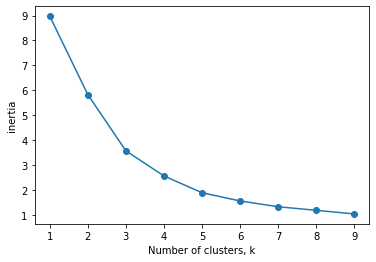

In [28]:
# Inertia value를 이용한 적정 군집수 판단

ks = range(1,10) # 1부터 10까지의 군집을 가지고 있을때

inertias = []



for k in ks:

    kMeans = KMeans(n_clusters=k)

    kMeans.fit(X_b)

    inertias.append(kMeans.inertia_)

    

# Plot ks vs inertias

plt.plot(ks, inertias, '-o')

plt.xlabel('Number of clusters, k')

plt.ylabel('inertia')

plt.xticks(ks)

plt.show() 


In [29]:
# 3 에서 5까지 변화의 값이 크지않다. 그러므로 3개에서 5개 사이의 클러스터를 가졌을때 적절하다
# k = 3로 설정
kMeans = KMeans(n_clusters=3,algorithm='auto')
kMeans.fit(X_b)

y_kmed = kMeans.fit_predict(X_b)

predict_b3 = pd.DataFrame(kMeans.predict(X_b))
predict_b3.columns=['predict_b3']

y_kmed

array([2, 1, 1, 0, 1, 1, 1, 2, 0, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 1, 1, 2,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 2, 1,
       0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 2, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 2, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 2, 1, 1, 1, 0, 0, 1, 1, 0, 2, 0, 0, 0, 1, 1, 1, 0, 1,
       1, 1, 1, 2, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [30]:
kMeans.inertia_

3.568611520822621

In [31]:
from sklearn.metrics import silhouette_samples, silhouette_score

silhouette_avg = silhouette_score(X_b, y_kmed)
print(silhouette_avg)

0.41106147424239425


In [32]:
sample_silhouette_values = silhouette_samples(X_b, y_kmed)
for i in range(3):
    ith_cluster_silhouette_values = sample_silhouette_values[y_kmed == i]
    print(np.mean(ith_cluster_silhouette_values))

0.32550891670587967
0.48619313527759783
0.30374218097915934


In [33]:
r = pd.concat([X_b,predict_b3],axis=1)
#r

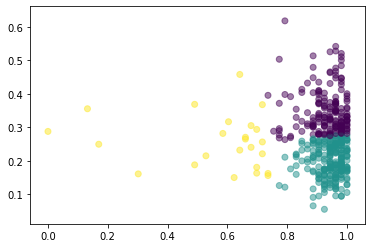

In [34]:
#분포도 시각화
plt.scatter(r['행정동별은행분포'],r['TargetB밀도'],c=r['predict_b3'],alpha=0.5)


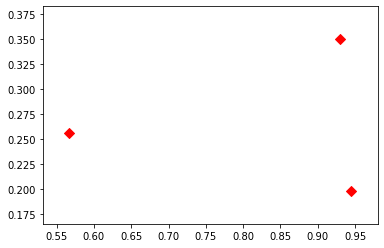

In [35]:
#중심표시
centers = pd.DataFrame(kMeans.cluster_centers_,columns=['행정동별은행분포','TargetB밀도'])
center_x = centers['행정동별은행분포']
center_y = centers['TargetB밀도']
plt.scatter(center_x,center_y,s=50,marker='D',c='r')

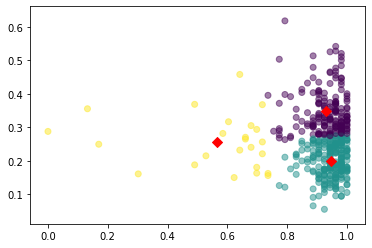

In [36]:
#분포도에 중심표시
plt.scatter(r['행정동별은행분포'],r['TargetB밀도'],c=r['predict_b3'],alpha=0.5)
plt.scatter(center_x,center_y,s=50,marker='D',c='r')

## 여기서 centers의 값이랑 위의 우리가 원하는 우선순위가 매칭되게 생각 잘 해주세요

In [37]:
centers = kMeans.cluster_centers_
print(centers)

[[0.93037626 0.34992067]
 [0.94496169 0.19825969]
 [0.5668239  0.25608114]]


In [38]:
data = pd.merge(df_은행, r, on=["행정동별은행분포", "TargetB밀도"])

In [39]:
data = data[['행정동코드', '구', '동', 'predict_b3']]
#data

## 위에서 생각한 우리가 원하는 우선순위가 되게 = 이전의 data [ ] 의 숫자를 변경해주세요

In [ ]:
#data의 [ ] 부분에 지금 현재 a3에 들어있는 값 == [] 이면 1 아니면 0을 넣는 column을 생성해라(3번 시행)
data['cluster1'] = (data['predict_b3'] == 0 ).astype(int)
data['cluster2'] = (data['predict_b3'] == 1 ).astype(int)
data['cluster0'] = (data['predict_b3'] == 2 ).astype(int)

#새로 만든 column들을 더해서 우리가 진짜 원하는 순차적인 우선순위를 가진 cluster를 갖게 합산해서 cluster라는 컬럼을 만들자.
# 0 1 2를 2점 1점 0점으로 되게

data['cluster'] = data['cluster0']*2 + data['cluster1']*1 + data['cluster2'] * 0
data

In [ ]:
data2 = data[['행정동코드', '구', '동', 'cluster']]
data2

## 시각화

In [45]:
#지도 코드
import pandas as pd
import folium

max_data = max(data2['cluster']) #이것처럼 생활인구면 max(data['행정동별생활인구합계']), 연금이면 max(data['행정동별연금합계']) 이렇게 지정해주세요.

geo_data = 'complete_seoul-dong.geojson' #경로는 geojson 있는데로 바꿔주세요.

# 서울시 중심부의 위도, 경도 입니다.
center = [37.541, 126.986]

# 맵이 center 에 위치하고, zoom 레벨은 11로 시작하는 맵 m을 만듭니다.
m = folium.Map(location=center, zoom_start=10, tiles = 'cartodbpositron')

# Choropleth 레이어를 만들고, 맵 m에 추가합니다.
choropleth = folium.Choropleth(
    geo_data=geo_data,
    data=data,
    columns=('행정동코드', 'cluster'),
    key_on='feature.properties.행정동코드',
    fill_color='YlGn',
    bins=[(-0.000000001)*max_data, 0.3333333*max_data, 0.6666666*max_data, (1.000001)*max_data],
    legend_name='서울 행정동별 TargetB와 은행분포 비교', #자기 데이터 제목
    highlight = True,
).add_to(m)

folium.LayerControl().add_to(m)
choropleth.geojson.add_child(
    folium.features.GeoJsonTooltip(
    fields=['동'],
    aliases=['위치:'])
)

m.save('서울 행정동별 TargetB와 은행분포 비교3.html') #저장할 html 이름 지정
#소득.html 열어서 확인


## DT의 target 변수 엑셀로 저장하기

In [ ]:
# DT에 쓰이는 타겟변수 만드는 코드
df = data[['행정동코드', '구', '동']]
df['targetb_3'] = (data2['cluster'] == 2 ).astype(int)
df

In [ ]:
df.to_excel("target_b3.xlsx", encoding='utf-8')